In [2]:
import pandas as pd
%matplotlib inline

# Air quality data

In [3]:
aq = pd.read_csv("airquality.csv")
aq.head(4)

,Month,Nitric Oxide,Nitrogen Dioxide,Ozone,PM10,Sulphur Dioxide
0,Jan-08,NaN,55.502688,29.512097,24.969086,4.217742
1,Feb-08,NaN,75.922414,20.317529,39.477011,7.553161
2,Mar-08,NaN,55.610215,40.103495,21.569892,3.868280
3,Apr-08,NaN,61.756944,37.884722,28.740278,4.475000


*What does NaN mean?*

*Are there any other problems with this table?*

In [189]:
# Let's see what pandas thinks the data are?
aq.dtypes

Nitric Oxide        float64
Nitrogen Dioxide    float64
Ozone               float64
PM10                float64
Sulphur Dioxide     float64
dtype: object

## MAKING THE MONTH COLUMN INTO A DATE INDEX
Documentation for the format string: https://docs.python.org/3.5/library/datetime.html?format#strftime-strptime-behavior

In [162]:
# Test run
pd.to_datetime(aq["Month"], format="%b-%y").head(3)

0   2008-01-01
1   2008-02-01
2   2008-03-01
Name: Month, dtype: datetime64[ns]

In [163]:
# That looks better so make it stick
aq["Month"] = pd.to_datetime(aq["Month"],format="%b-%y")

The month column should be the *index* of this data rather than the row number so let's fix that next

In [164]:
# Again, test run first
aq.set_index("Month").head(2)

,Nitric Oxide,Nitrogen Dioxide,Ozone,PM10,Sulphur Dioxide
Month,,,,,
2008-01-01,NaN,55.502688,29.512097,24.969086,4.217742
2008-02-01,NaN,75.922414,20.317529,39.477011,7.553161


In [165]:
# Looks good so go for it
aq = aq.set_index("Month")

## DOING SOME ACTUAL ANALYSIS

Now that initial effort starts to pay off

In [175]:
# What was the highest Nitric Oxide reading?
aq["Nitric Oxide"].max()

150.1479885

In [178]:
# And when was that?
aq["Nitric Oxide"].idxmax()

Timestamp('2014-11-01 00:00:00')

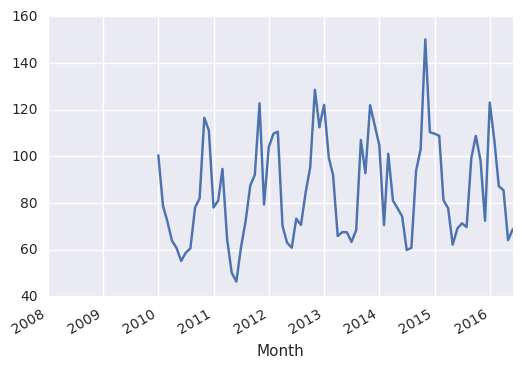

In [179]:
# How is that varying over time?
aq["Nitric Oxide"].plot()
# Note this only works like it does because we made the date the index

*Notice anything about this graph?*

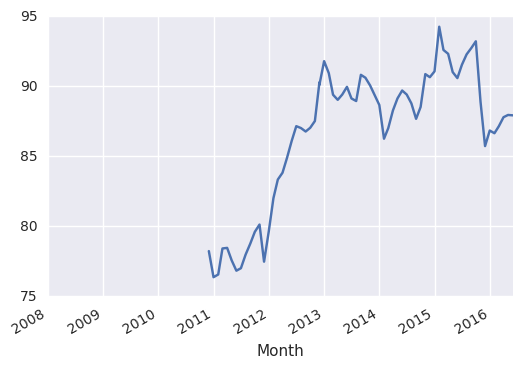

In [180]:
# So let's try a 12 month moving average
aq["Nitric Oxide"].rolling(window=12).mean().plot()

It's kind of misleading to have a $y$-axis that doesn't start from zero, though, isn't it?

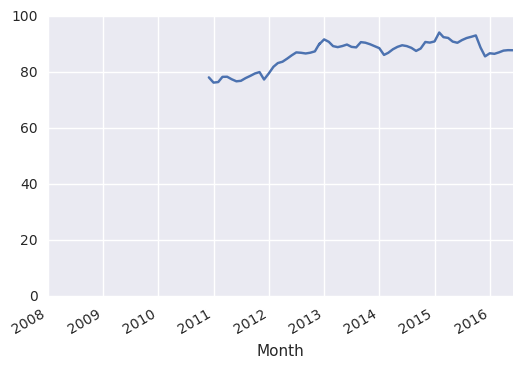

In [181]:
# So let's try a 12 month moving average with a full y-axis
aq["Nitric Oxide"].rolling(window=12).mean().plot(ylim=(0,100)) 

## FILTERING
There were a lot of NaNs before 2011 so let's just look at data since then.

In [182]:
aq[aq.index>'2011'].head(2)

,Nitric Oxide,Nitrogen Dioxide,Ozone,PM10,Sulphur Dioxide
Month,,,,,
2011-02-01,81.109077,60.358482,23.497321,32.575595,2.898958
2011-03-01,94.672715,68.964785,23.043683,43.314919,3.803898


In [183]:
# This works on individual columns (series) too
aq["Nitric Oxide"][aq.index>="2011"].head(3)

Month
2011-01-01    78.136694
2011-02-01    81.109077
2011-03-01    94.672715
Name: Nitric Oxide, dtype: float64

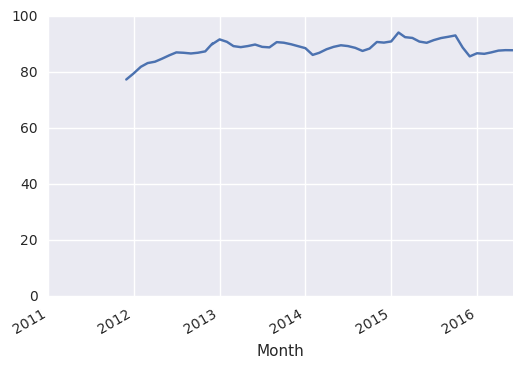

In [184]:
# Back to our plot 12-month moving average plot
aq["Nitric Oxide"][aq.index>="2011"].rolling(
    window=12).mean().plot(ylim=(0,100))

## CORRELATION

So far we've looked at one variable at a time. How about looking for a correlation between two variables?

First visually, using Pandas' `scatter` plot:

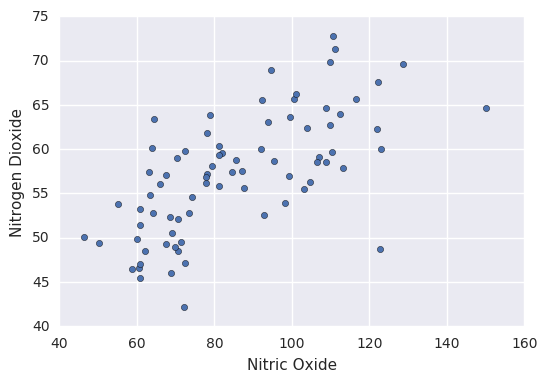

In [185]:
aq.plot(x="Nitric Oxide",y="Nitrogen Dioxide",kind="scatter")

That looks like a positive correlation.

`seaborn` has better correlation plotting tools so let's import that.

In [186]:
import seaborn

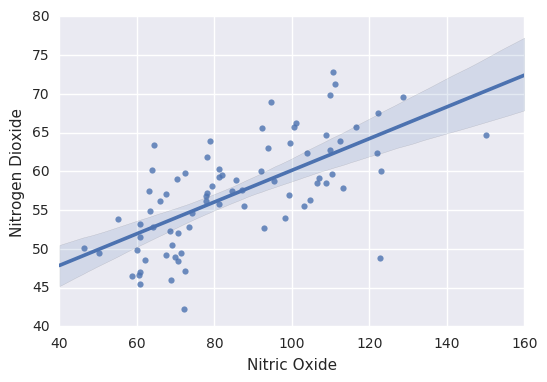

In [187]:
# regression is a related concept to correlation
seaborn.regplot(aq["Nitric Oxide"],aq["Nitrogen Dioxide"])

This correlation looks fairly strong. How strong?

In [188]:
aq["Nitric Oxide"].corr(aq["Nitrogen Dioxide"])

0.65892461441317374

So as expected, this is a fairly strong positive correlation.

# PRACTICE

1. What year was the highest recorded Sulphur Dioxide?
1. What was the lowest PM10 reading? When did that happen?
1. Is there a correlation between Ozone and Nitric Oxide readings? If so, how strong is it?
1. What other options are there for the `kind` argument to `pd.plot()`? What are they for?
1. What other plots can `seaborn` create?
1. Download some other data of interest. You might have to clean it up in excel and then export to csv.